# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

#df = pd.read_csv('data/cars.csv')
#df.head()

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [3]:
# Load data

df = pd.read_csv('cars.csv')
df.head


<bound method NDFrame.head of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinde

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [7]:
# 1. Print the number of duplicate rows we have in our dataframe.

duplicate_count = (df.duplicated() == True).sum()
print(f"There are {duplicate_count} duplicates")


There are 720 duplicates


In [10]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [9]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

duplicate_count = (df.duplicated() == True).sum()
print(f"There are {duplicate_count} duplicates, Hooray!")

There are 0 duplicates, Hooray!


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [11]:
# * Which column has the most null values and how many null values does it have?
nullColumn = df.isnull().sum().idxmax()
nullCount = df.isnull().sum().max()

print(f"The {nullColumn} has the most null values; {nullColumn} has {nullCount} null values!")


The Engine HP has the most null values; Engine HP has 69 null values!


In [12]:
# * Print how long our dataframe is.
df_length = len(df)

print(f"The data frame has {df_length} rows!")


The data frame has 11194 rows!


In [13]:
# * Remove any row that has a null value in it. 

df = df.dropna()


In [17]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

df_len = df.shape[0]
print(f"Sanity check: there are now {df_len} rows! That is {df_length - df_len} rows gone!")

Sanity check: there are now 11092 rows! That is 102 rows gone!


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

Text(0, 0.5, 'Car Brand/Make')

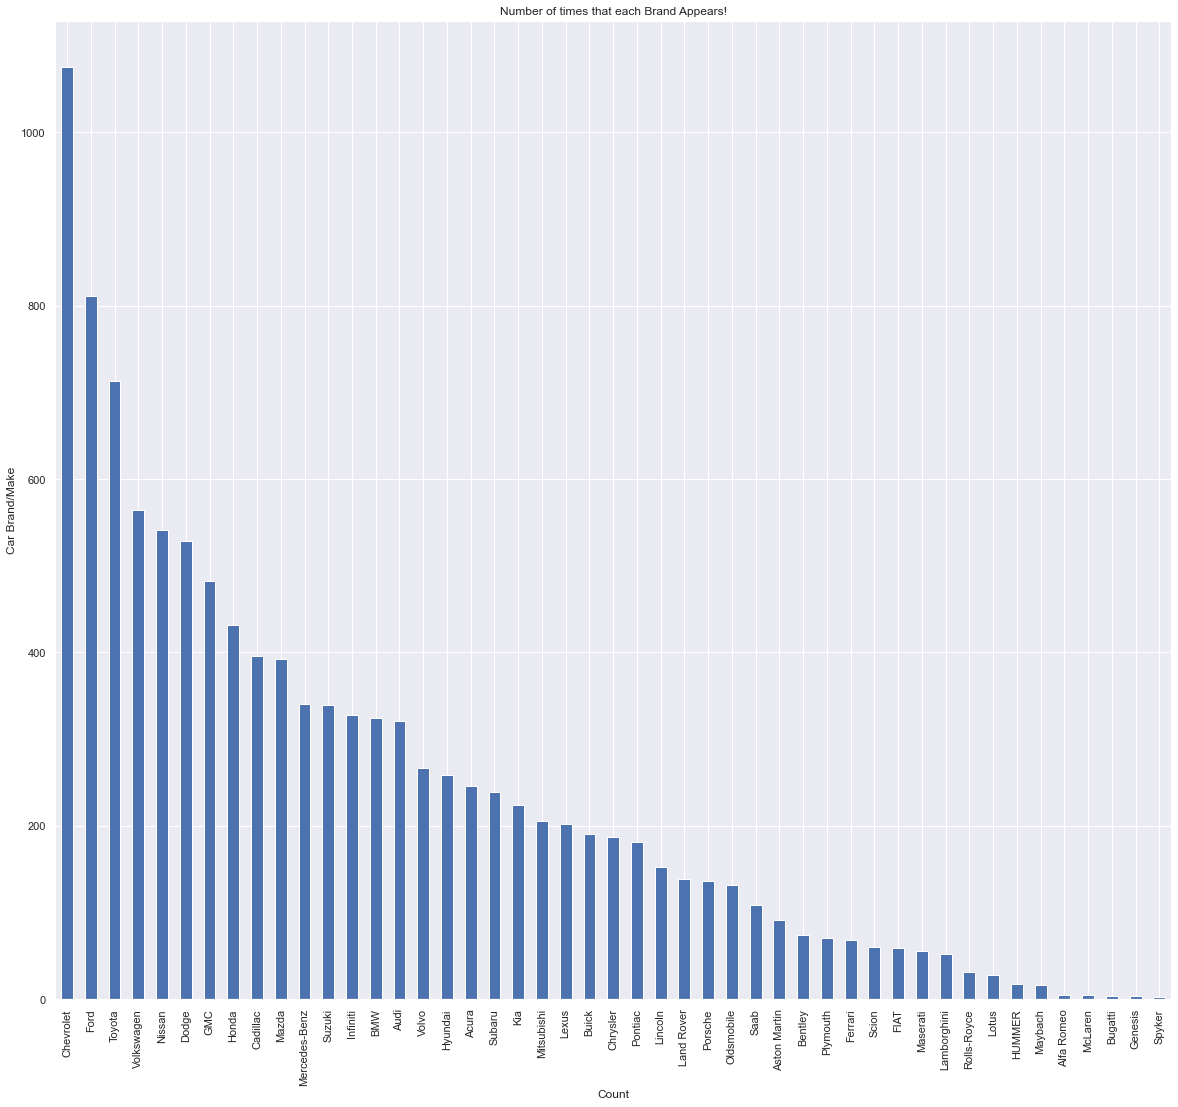

In [27]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

Counter = df['Make'].value_counts()


plt.figure(figsize=(20,18))
Counter.plot(kind = 'bar')
plt.title('Number of times that each Brand Appears!')
plt.xlabel('Count')
plt.ylabel('Car Brand/Make')



# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

Text(0, 0.5, 'Car Brand/Make')

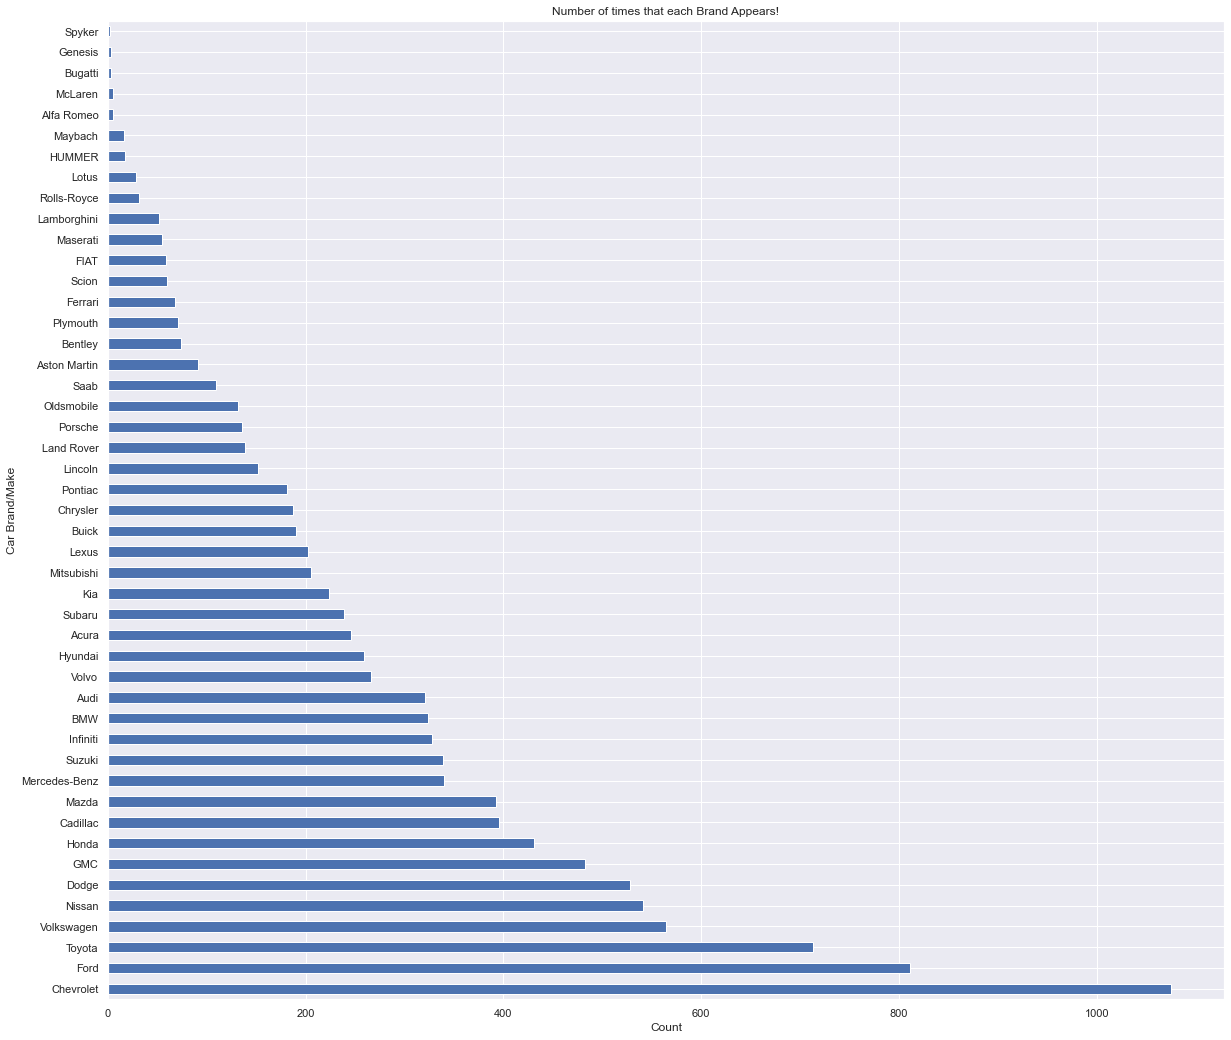

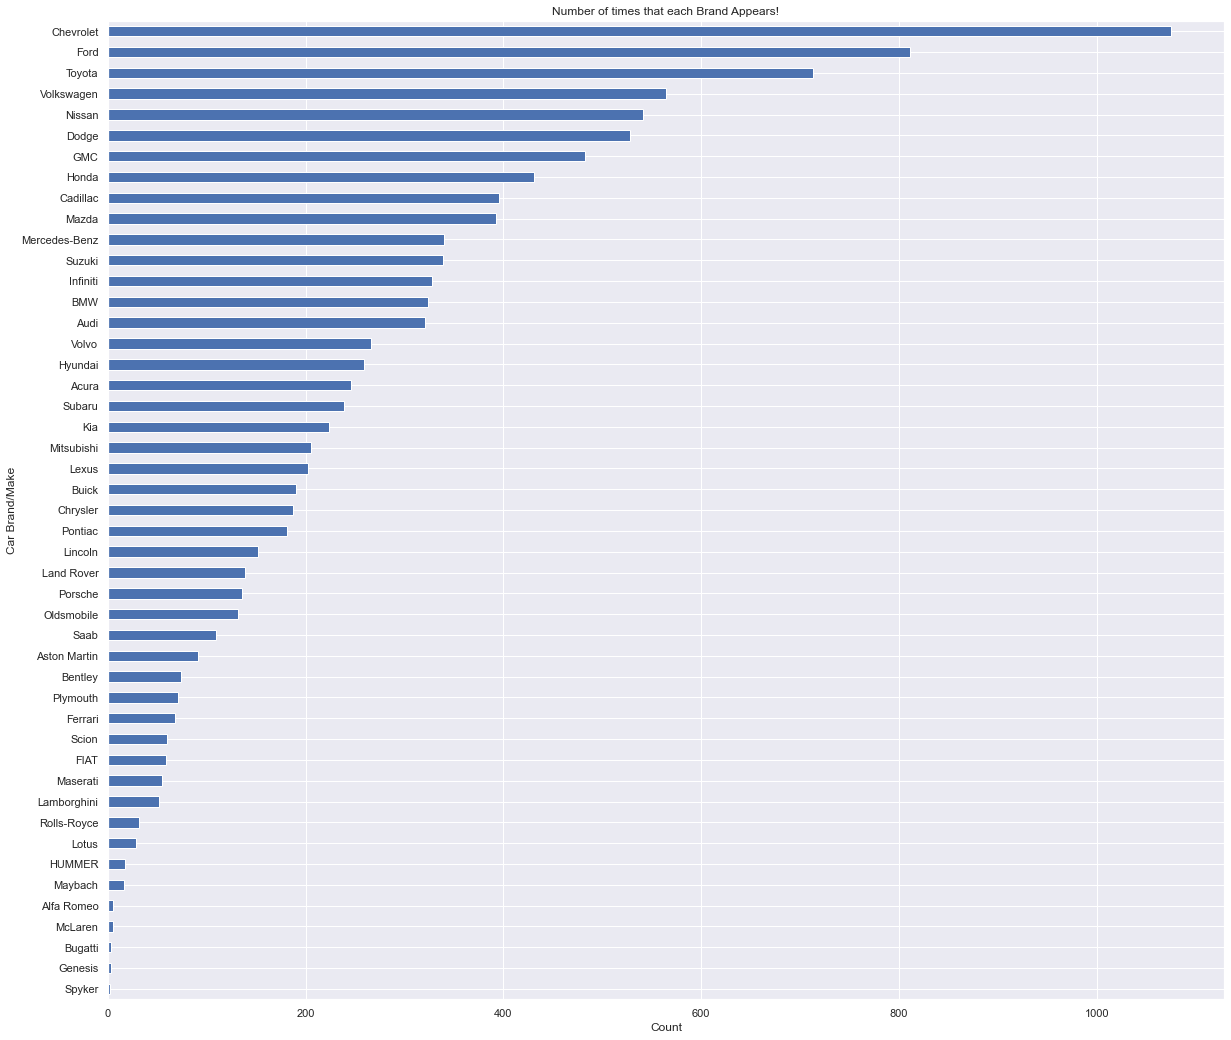

In [33]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

Counter = df['Make'].value_counts()

counterSorted = Counter.sort_values(ascending = False)

plt.figure(figsize=(20,18))
counterSorted.plot(kind = 'barh')
plt.title('Number of times that each Brand Appears!')
plt.xlabel('Count')
plt.ylabel('Car Brand/Make')


#i dont know if you mean lowest to highest as in lowest on top or bottom so I did both ways!
Counter = df['Make'].value_counts()

counterSorted = Counter.sort_values(ascending = True)

plt.figure(figsize=(20,18))
counterSorted.plot(kind = 'barh')
plt.title('Number of times that each Brand Appears!')
plt.xlabel('Count')
plt.ylabel('Car Brand/Make')

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


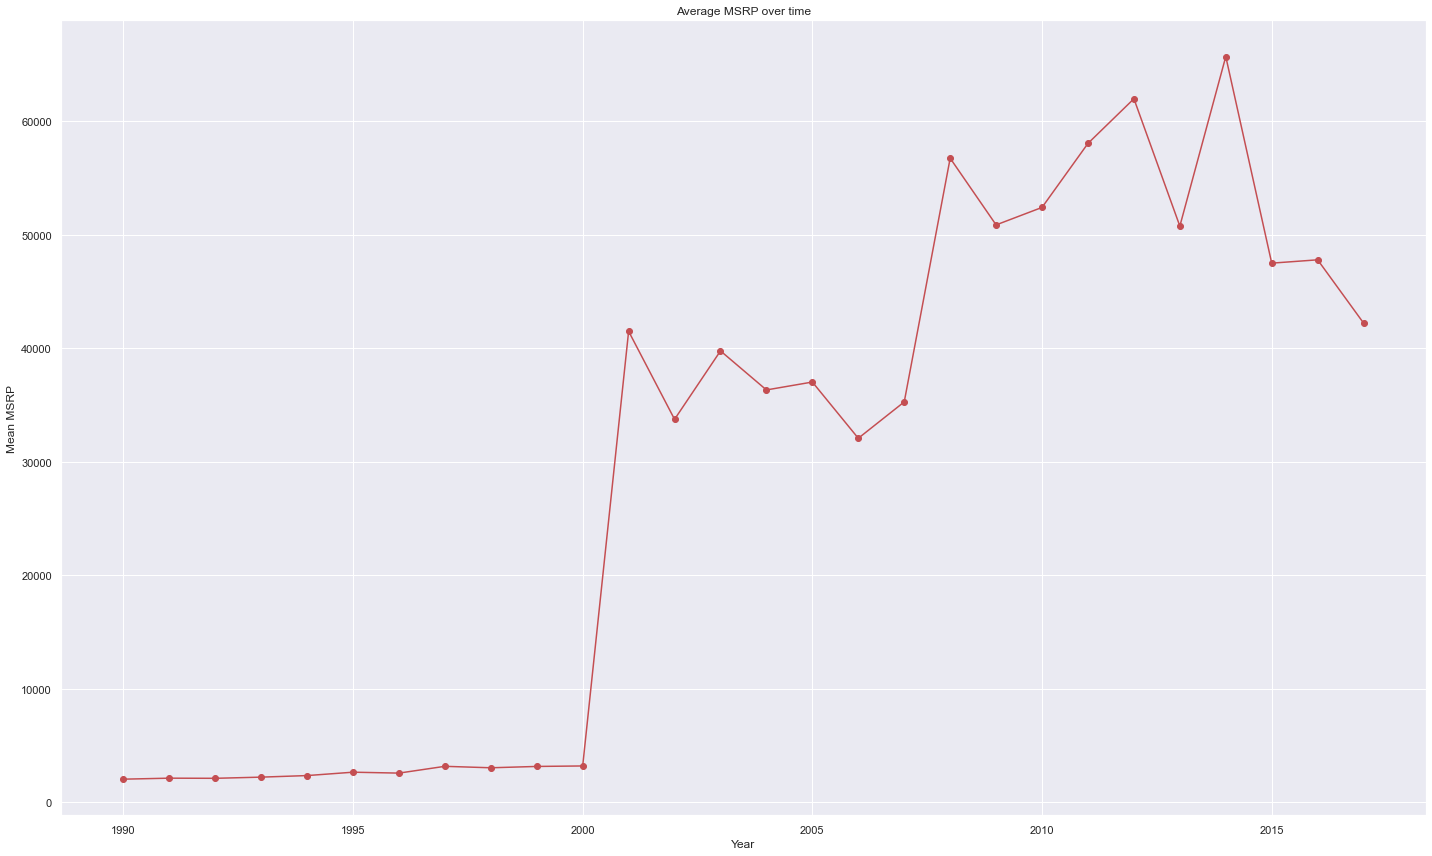

The error inflation as money years ago is not worth the same as money now


In [54]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.


average_df = df.groupby('Year')['MSRP'].mean().reset_index()

x = average_df['Year']
y = average_df['MSRP']

plt.figure(figsize = (20,12))
plt.plot(x,y, marker = 'o', linestyle = '-', color = 'r')

plt.xlabel('Year')
plt.ylabel('Mean MSRP')
plt.title('Average MSRP over time')

plt.grid(True)
plt.tight_layout()
plt.show()


print("The error inflation as money years ago is not worth the same as money now")

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [51]:
# Make a column where is 10 when year is less than 2000, else 1.
df['newColumn'] = df['Year'].apply(lambda year: 10 if year < 2000 else 1)
#print(df)

# Multiply the MSRP by the price adjuster.

df['adjusted_price'] = df.apply(lambda row: row['MSRP'] * 10 if row['Year'] < 2000 else row['MSRP'], axis =1)
#print(df)

#sanity Test
sample_rows = df[df['Year'] < 2000].sample(5) 
print(sample_rows[['Year', 'MSRP', 'adjusted_price']])

      Year  MSRP  adjusted_price
6555  1999  2044           20440
4613  1998  3138           31380
2821  1992  2000           20000
3320  1993  2000           20000
908   1998  2000           20000


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

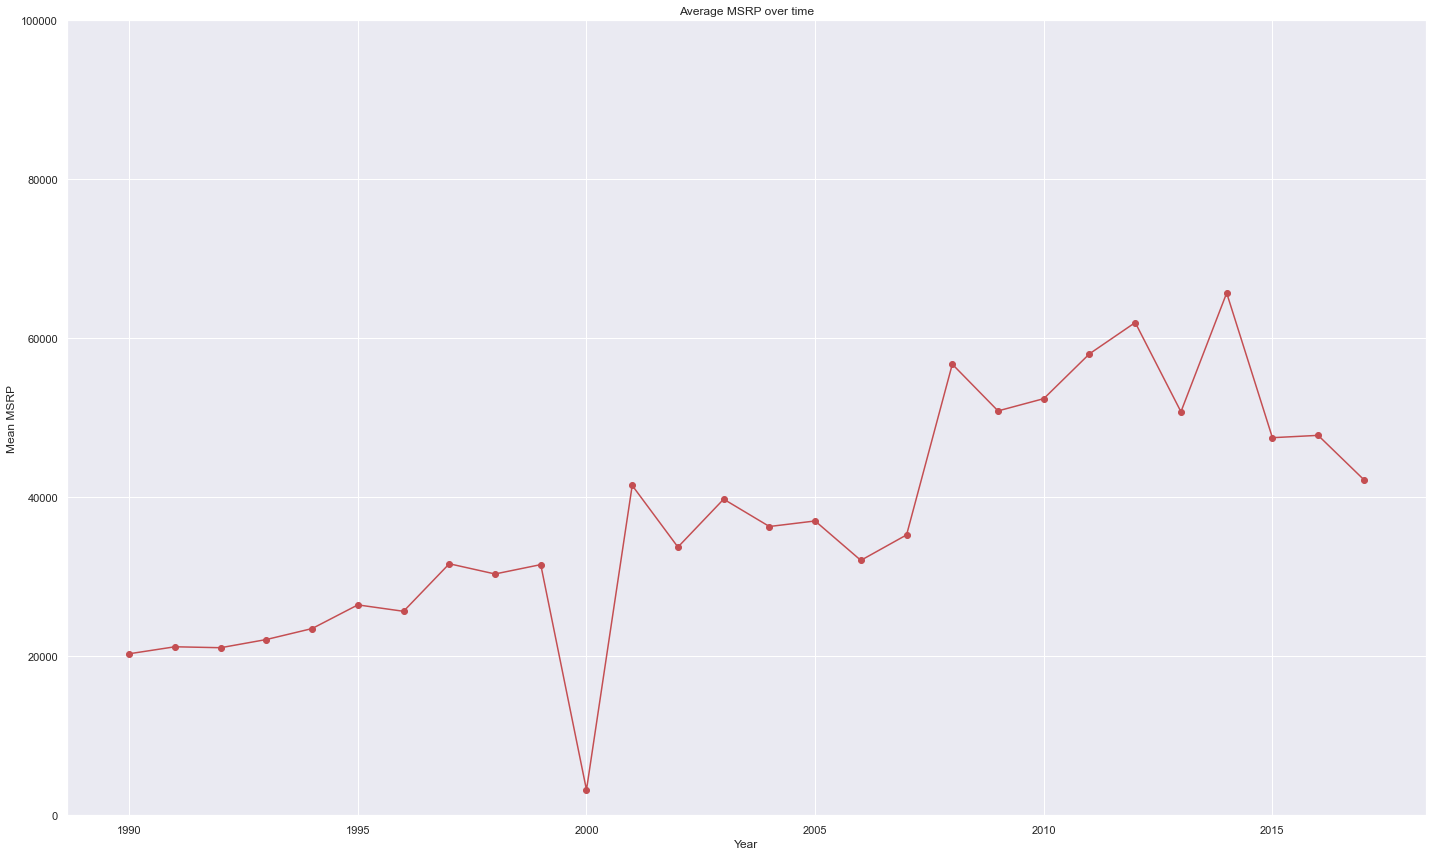

In [53]:
# Plot new prices


average_df = df.groupby('Year')['adjusted_price'].mean().reset_index()

x = average_df['Year']
y = average_df['adjusted_price']

plt.figure(figsize = (20,12))
plt.plot(x,y, marker = 'o', linestyle = '-', color = 'r')

plt.ylim(0, 100000)
plt.xlabel('Year')
plt.ylabel('Mean MSRP')
plt.title('Average MSRP over time')

plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the relationship between Engine HP and highway MPG

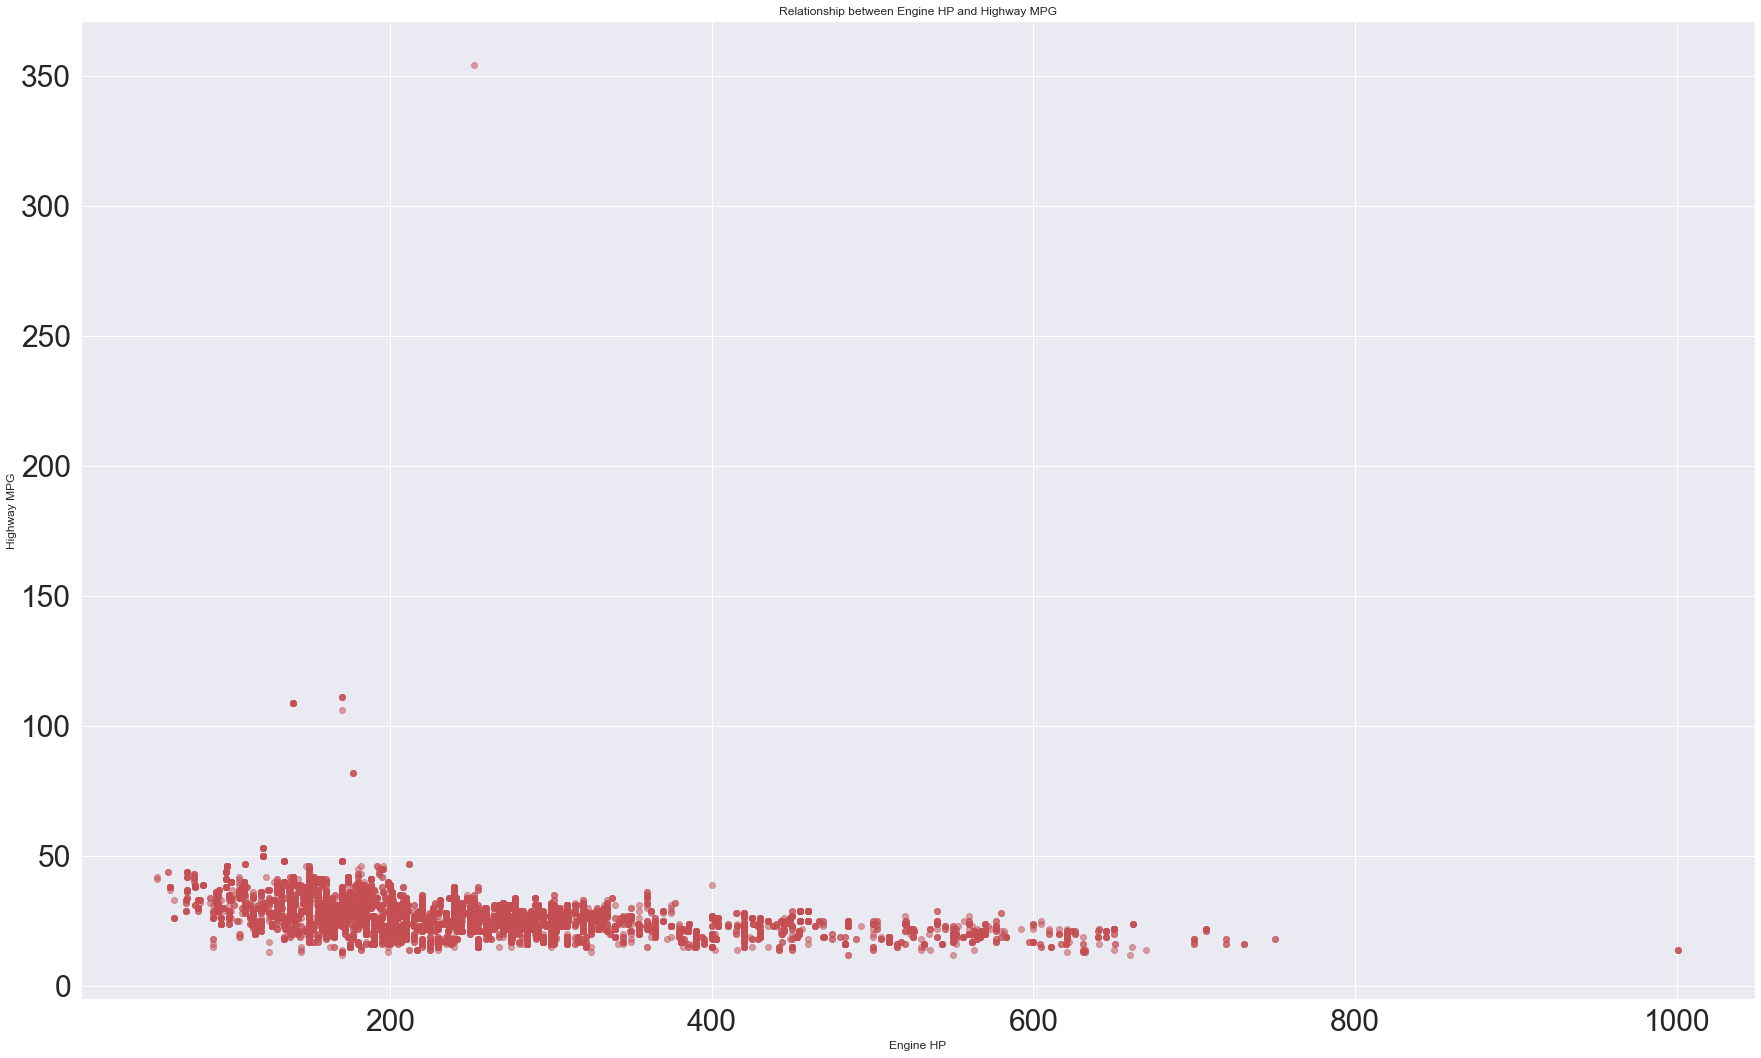

In [63]:
# Plot the relationship between Engine HP and highway MPG

engineHP = df['Engine HP']
highwayMPG = df['highway MPG']

plt.figure(figsize = (30,18))
plt.scatter(engineHP, highwayMPG, alpha = 0.5, color = 'r')

plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.title('Relationship between Engine HP and Highway MPG')
plt.tick_params(axis='both', which='major', labelsize=30)

plt.grid(True)
plt.tight_layout
plt.show()



In [73]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 


selected_Condition = df['highway MPG'] < 80
df = df[selected_Condition]

# Replot the relationship between Engine HP and highway MPG


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


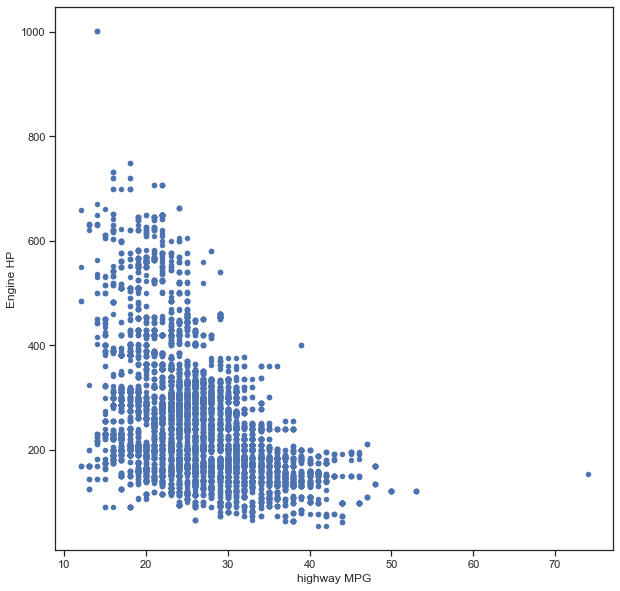

In [74]:
# Re-Plot the relationship between Engine HP and highway MPG
df.plot(kind = 'scatter', x='highway MPG', y='Engine HP', figsize=(10,10))

# Make a scatter plot of Engine HP vs highway MPG

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


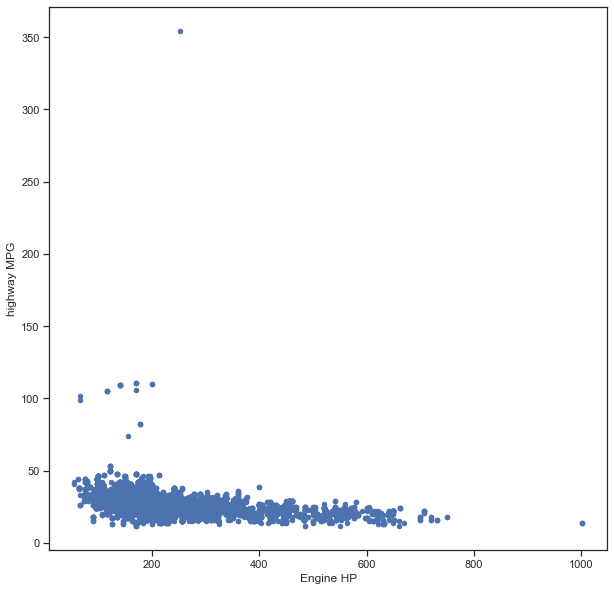

In [72]:
# Make a scatter plot of Engine HP vs highway MPG
df.plot(kind = 'scatter', x='Engine HP', y='highway MPG', figsize=(10,10))

# What does this plot tell you about how Engine HP affects highway MPG?

In [71]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('Cars that have less than 25 highway MPG, seem to have higher engine HP. Less horse power, means higher highway MPG.')

Cars that have less than 25 highway MPG, seem to have higher engine HP. Less horse power, means higher highway MPG.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

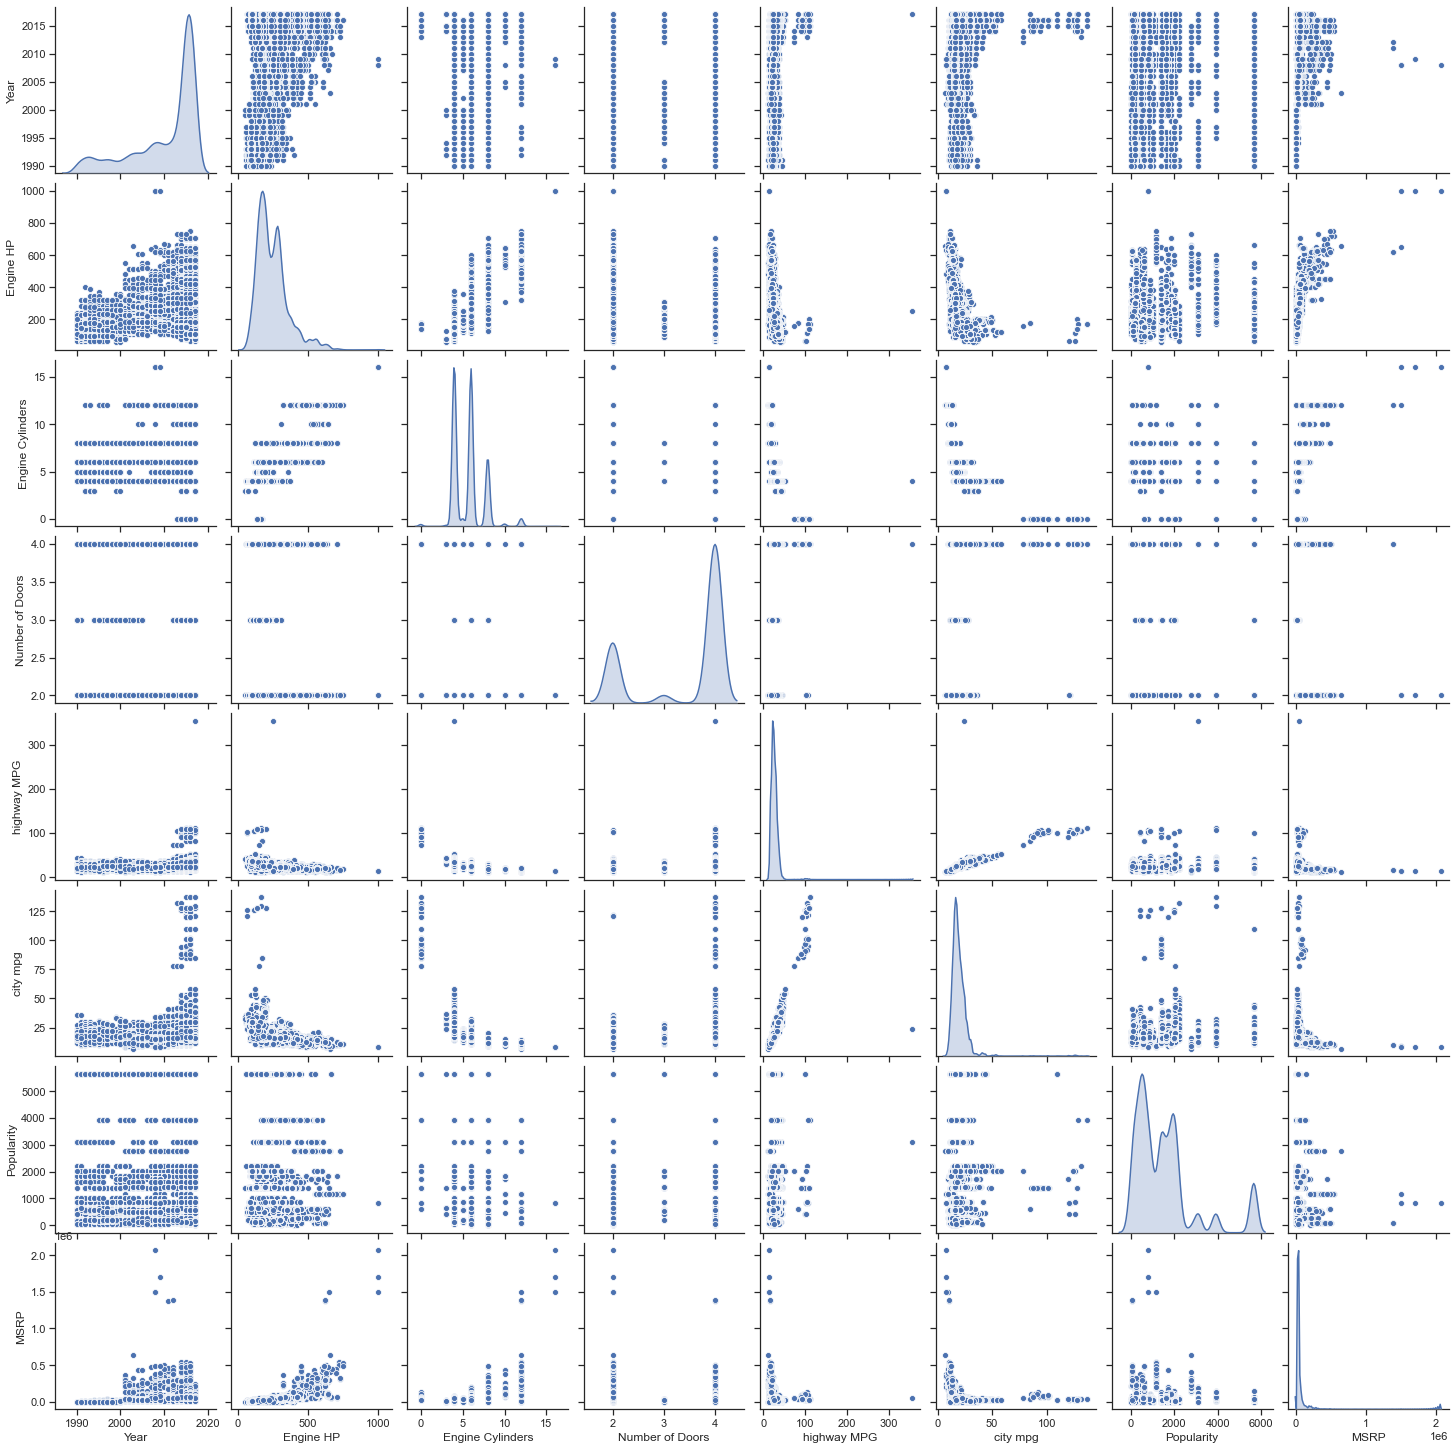

In [68]:
# Using a pairplot, display all of the linear relationship.

df = pd.read_csv('cars.csv')
sns.set(style = 'ticks')
sns.pairplot(df, diag_kind = 'kde', markers='o')

plt.show()

In [70]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print('(Overall it seems that as the Years progress, most relationships get stronger. In my opinion the strongest Linear relationship is Year and Popularity')

(Overall it seems that as the Years progress, most relationships get stronger. In my opinion the strongest Linear relationship is Year and Popularity


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

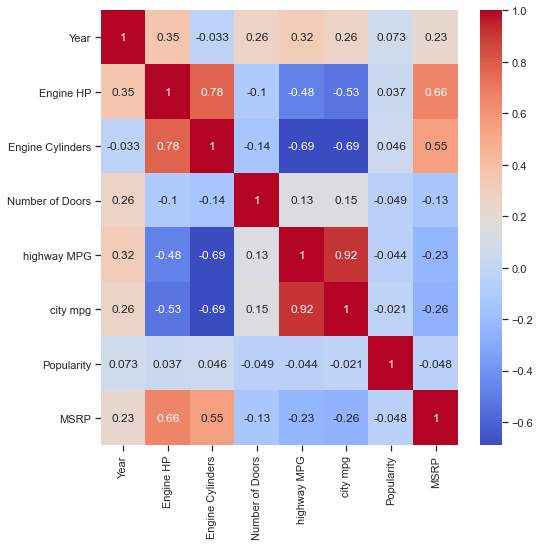

In [75]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

new_df = df.drop(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis=1)

plt.figure(figsize=(8, 8))
sns.heatmap( new_df.corr(), annot=True,
            cmap='coolwarm')


In [76]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Enginge Cylinders')

Enginge Cylinders


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


